# Demo spike train correlation metrics
Elephant toolbox: Correlative measures on spike trains, Spike train correlation

## Set-up

### Imports

In [1]:
# general
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython import display

import neo
import quantities as pq
import elephant

### Settings

### Create output directory

In [ ]:
dir_out = "../figures/demo_spike_train_correlation"
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

### Functions

## Main

### simulate spike trains

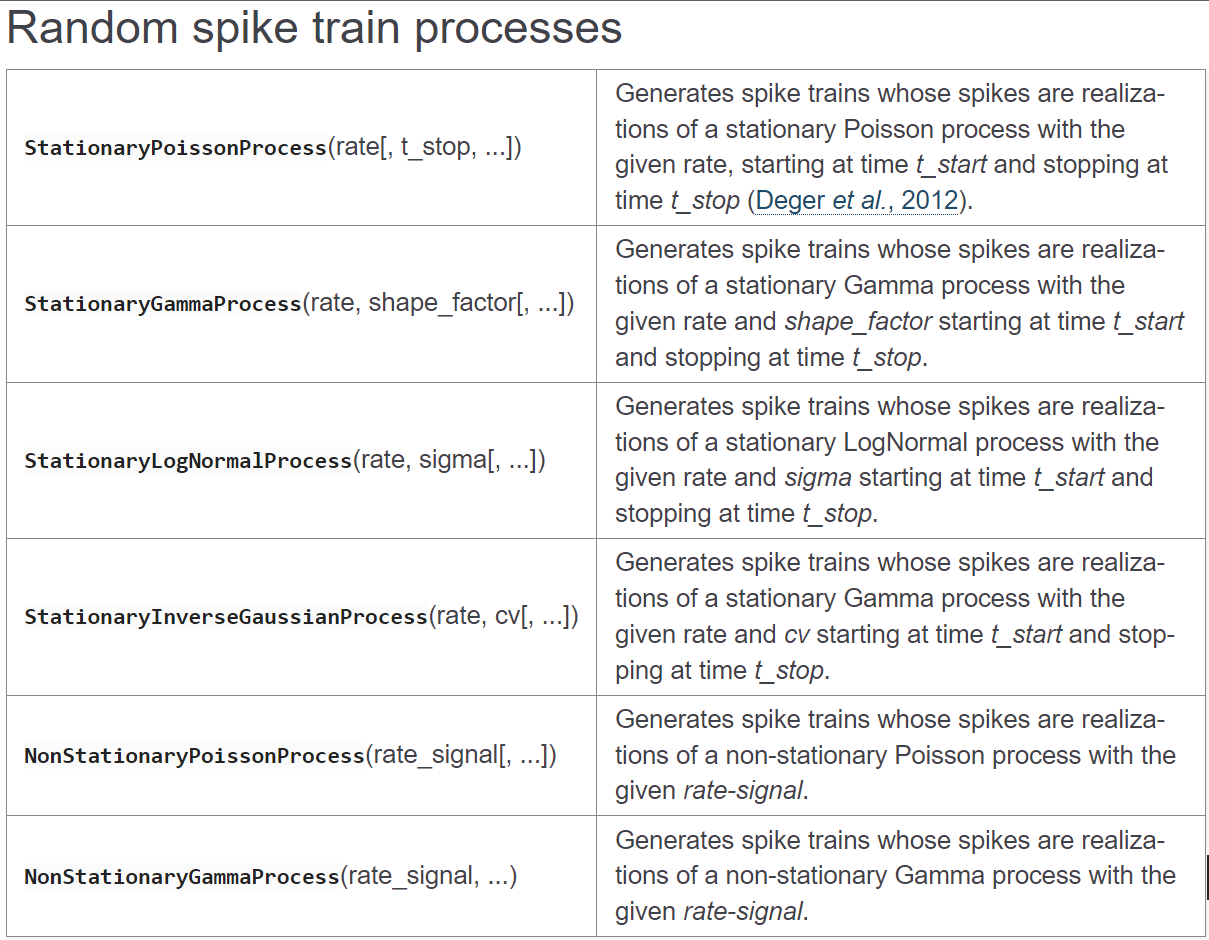

In [15]:
# Elephant provides several function for generating spike trains
display.Image("../figures/ipynb_images/elephant_spike_train_generation.png")

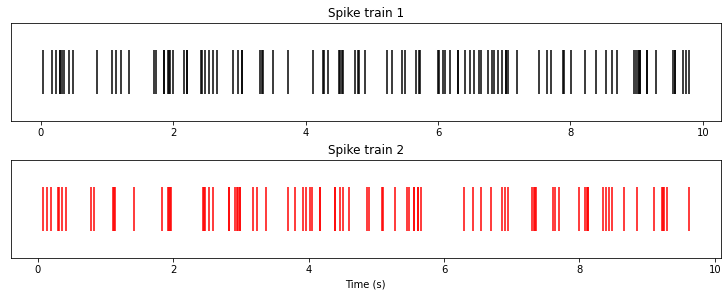

In [14]:
# simulate Poisson spike trains

# initiate 
spp = elephant.spike_train_generation.StationaryPoissonProcess(rate=10*pq.Hz, t_start=0*pq.s, t_stop=10*pq.s)

# get spikes
# st_1 = spp_1.generate_spiketrain()
st_2 = spp_1.generate_spiketrain()

# plot spike trains
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 4), constrained_layout=True)
ax1.eventplot(st_1.times, color='k', linelengths=0.5)
ax1.set_title('Spike train 1')
ax2.eventplot(st_2.times, color='r', linelengths=0.5)
ax2.set_title('Spike train 2')
ax2.set_xlabel('Time (s)')
for ax in [ax1, ax2]:
    ax.set_yticks([])

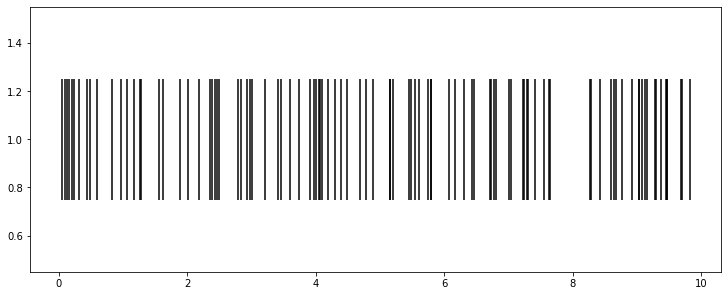

In [17]:
# simulate homogeneous Poisson process (shorthand)
spp_1 = elephant.spike_train_generation.homogeneous_poisson_process(rate=10*pq.Hz, t_start=0*pq.s, t_stop=10*pq.s)

# plot
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
ax.eventplot(spp_1.times, color='k', linelengths=0.5)

### Bin spike trains

<function matplotlib.pyplot.show(close=None, block=None)>

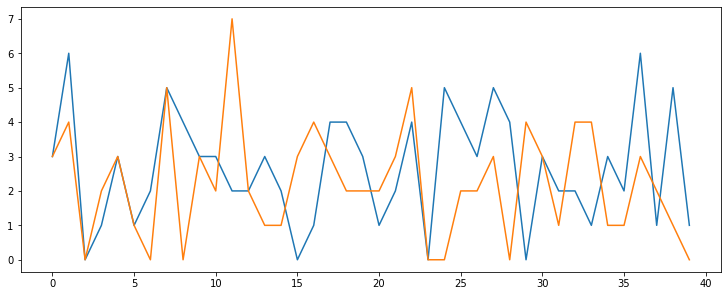

In [25]:
binned_st_1 = elephant.conversion.BinnedSpikeTrain(st_1, binsize=250*pq.ms)
binned_st_2 = elephant.conversion.BinnedSpikeTrain(st_2, binsize=250*pq.ms)

# plot
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
ax.plot(binned_st_1.to_array().flatten())
ax.plot(binned_st_2.to_array().flatten())
plt.show

### Covariance

In [28]:
covariance = elephant.spike_train_correlation.covariance(elephant.conversion.BinnedSpikeTrain([st_1, st_2], bin_size=250*pq.ms))
print(covariance)

[[2.74615385 0.31153846]
 [0.31153846 2.69166667]]


### Pearson's correlation coefficient

### Cross Correlation Histogram (CCH)

### Spike Time Tiling Coefficient (STTC)